In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# Fetch and Save the dataset (run only once)

In [3]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

In [4]:
# convert to dotdict
X = heart_disease.data.features
y = heart_disease.data.targets

# convert to numpy arrays
X = np.array(X)
y = np.array(y)

# convert to pandas dataframe
df = pd.DataFrame(np.c_[X, y], columns=heart_disease.data.headers)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


In [ ]:
# save dataset to csv
df.to_csv('../data/heart_disease.csv', index=False)

In [5]:
# create a description dataframe with variable names and corresponding descriptions
desc = np.array(heart_disease.variables.description)
desc = np.c_[heart_disease.variables.name, desc, heart_disease.variables.type]
desc = pd.DataFrame(desc, columns=['name', 'description', 'type'])
desc.set_index('name', inplace=True)

pd.set_option('display.max_colwidth', None) # to display full description
print(desc)
pd.reset_option('display.max_colwidth')

                                                    description         type
name                                                                        
age                                                        None      Integer
sex                                                        None  Categorical
cp                                                         None  Categorical
trestbps  resting blood pressure (on admission to the hospital)      Integer
chol                                          serum cholestoral      Integer
fbs                             fasting blood sugar > 120 mg/dl  Categorical
restecg                                                    None  Categorical
thalach                             maximum heart rate achieved      Integer
exang                                   exercise induced angina  Categorical
oldpeak      ST depression induced by exercise relative to rest      Integer
slope                                                      None  Categorical

# Handle missing values

In [23]:
# print rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0.0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0.0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1.0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2.0
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0.0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0.0


In [ ]:
#impute categorical missing values
df.ffill(inplace=True) #forward fill: fill missing values with the previous value.
df.loc[missing_rows.index] #re-check missing values after imputation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,3.0,0.0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0,0.0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,3.0,7.0,1.0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,6.0,2.0
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,2.0,7.0,0.0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,1.0,3.0,0.0


# Perform data encoding on categorical features

In [ ]:
categorical_var_names = desc.loc[desc['type'] == 'Categorical'].index.values

# Check the unique values in categorical variables
print("Unique values in categorical variables:")
for var in categorical_var_names:
    print(f"{var}: {np.sort(df[var].unique())}")

# Perform one hot encoding for categorical variables
# drop_first=True avoids dummy variable trap by dropping the first category of each categorical variable
df_preprocessed = pd.get_dummies(df, columns=categorical_var_names, drop_first=True) 
df_preprocessed

Unique values in categorical variables:
sex: [0. 1.]
cp: [1. 2. 3. 4.]
fbs: [0. 1.]
restecg: [0. 1. 2.]
exang: [0. 1.]
slope: [1. 2. 3.]
thal: [3. 6. 7.]


,age,trestbps,chol,thalach,oldpeak,ca,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0.0,0.0,True,False,False,False,True,False,True,False,False,True,True,False
1,67.0,160.0,286.0,108.0,1.5,3.0,2.0,True,False,False,True,False,False,True,True,True,False,False,False
2,67.0,120.0,229.0,129.0,2.6,2.0,1.0,True,False,False,True,False,False,True,True,True,False,False,True
3,37.0,130.0,250.0,187.0,3.5,0.0,0.0,True,False,True,False,False,False,False,False,False,True,False,False
4,41.0,130.0,204.0,172.0,1.4,0.0,0.0,False,True,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,110.0,264.0,132.0,1.2,0.0,1.0,True,False,False,False,False,False,False,False,True,False,False,True
299,68.0,144.0,193.0,141.0,3.4,2.0,2.0,True,False,False,True,True,False,False,False,True,False,False,True
300,57.0,130.0,131.0,115.0,1.2,1.0,3.0,True,False,False,True,False,False,False,True,True,False,False,True
301,57.0,130.0,236.0,174.0,0.0,1.0,1.0,False,True,False,False,False,False,True,False,True,False,False,False


# Standardize numerical features

In [63]:
numerical_var_names = desc.loc[(desc['type'] == 'Integer') & (desc.index != 'num')].index.values  # exclude target variable 'num'
# Check the numerical variables
print("Numerical variables:", numerical_var_names)

# Standardize numerical features
scaler = StandardScaler()
df_preprocessed[numerical_var_names] = scaler.fit_transform(df_preprocessed[numerical_var_names])
df_preprocessed

Numerical variables: ['age' 'trestbps' 'chol' 'thalach' 'oldpeak' 'ca']


,age,trestbps,chol,thalach,oldpeak,ca,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,-0.724272,0.0,True,False,False,False,True,False,True,False,False,True,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2.456228,2.0,True,False,False,True,False,False,True,True,True,False,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1.396061,1.0,True,False,False,True,False,False,True,True,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,-0.724272,0.0,True,False,True,False,False,False,False,False,False,True,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,-0.724272,0.0,False,True,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,-1.234430,0.334813,-0.770990,0.138373,-0.724272,1.0,True,False,False,False,False,False,False,False,True,False,False,True
299,1.502821,0.700612,-1.038723,-0.376896,2.036303,1.396061,2.0,True,False,False,True,True,False,False,False,True,False,False,True
300,0.283813,-0.096170,-2.238149,-1.515388,0.138373,0.335894,3.0,True,False,False,True,False,False,False,True,True,False,False,True
301,0.283813,-0.096170,-0.206864,1.068113,-0.896862,0.335894,1.0,False,True,False,False,False,False,True,False,True,False,False,False


In [81]:
#save preprocessed data to csv
df_preprocessed.to_csv('../data/heart_disease.csv', index=False)

In [2]:
#load preprocessed data
df_preprocessed = pd.read_csv('../data/heart_disease.csv')

# Exploratory Data Analysis (EDA)
orignal data before preprocessing is used for clarity

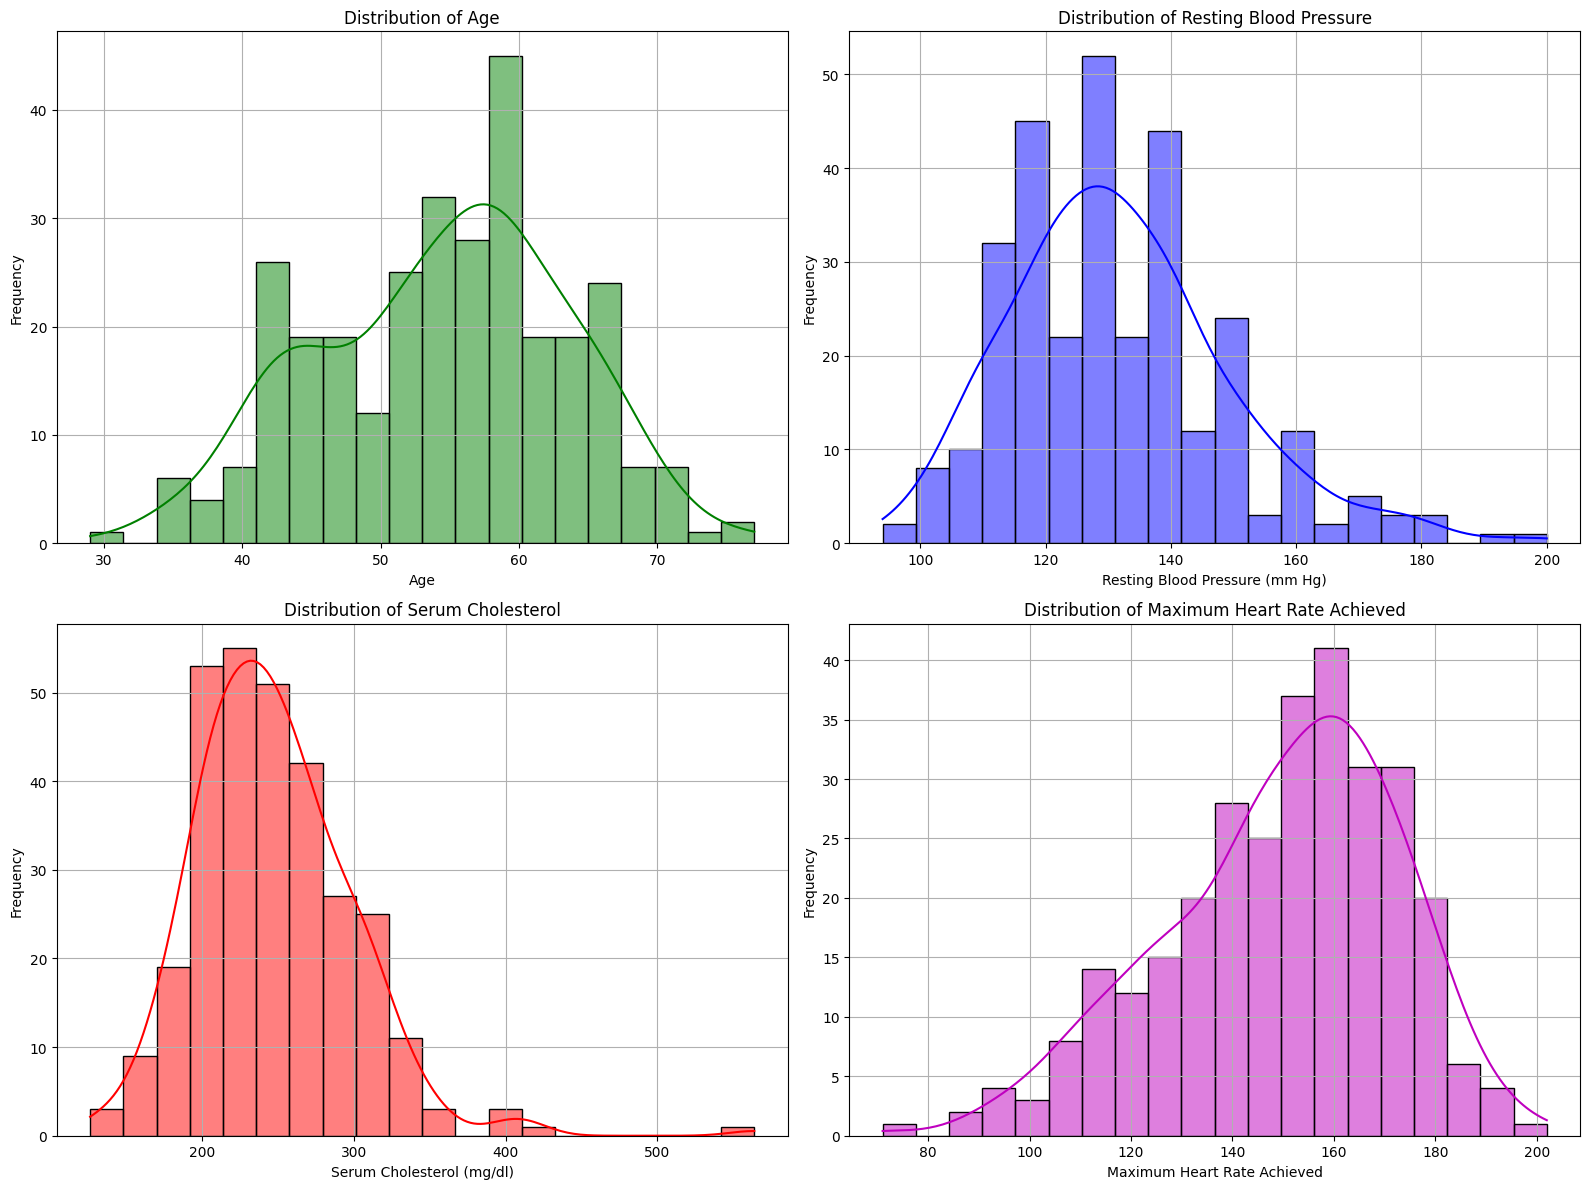

In [ ]:
#histograms
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(df['age'], kde=True, color='g', bins=20, ax=ax1)
ax1.set_title('Distribution of Age') 
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.grid(True)

sns.histplot(df['trestbps'], kde=True, color='b', bins=20, ax=ax2)
ax2.set_title('Distribution of Resting Blood Pressure (trestbps)')
ax2.set_xlabel('Resting Blood Pressure (mm Hg)')
ax2.set_ylabel('Frequency')
ax2.grid(True)

sns.histplot(df['chol'], kde=True, color='r', bins=20, ax=ax3)
ax3.set_title('Distribution of Serum Cholesterol (chol)')
ax3.set_xlabel('Serum Cholesterol (mg/dl)')
ax3.set_ylabel('Frequency')
ax3.grid(True)

sns.histplot(df['thalach'], kde=True, color='m', bins=20, ax=ax4)
ax4.set_title('Distribution of Maximum Heart Rate Achieved (thalach)')
ax4.set_xlabel('Maximum Heart Rate Achieved')
ax4.set_ylabel('Frequency')
ax4.grid(True)

plt.tight_layout()
plt.show()

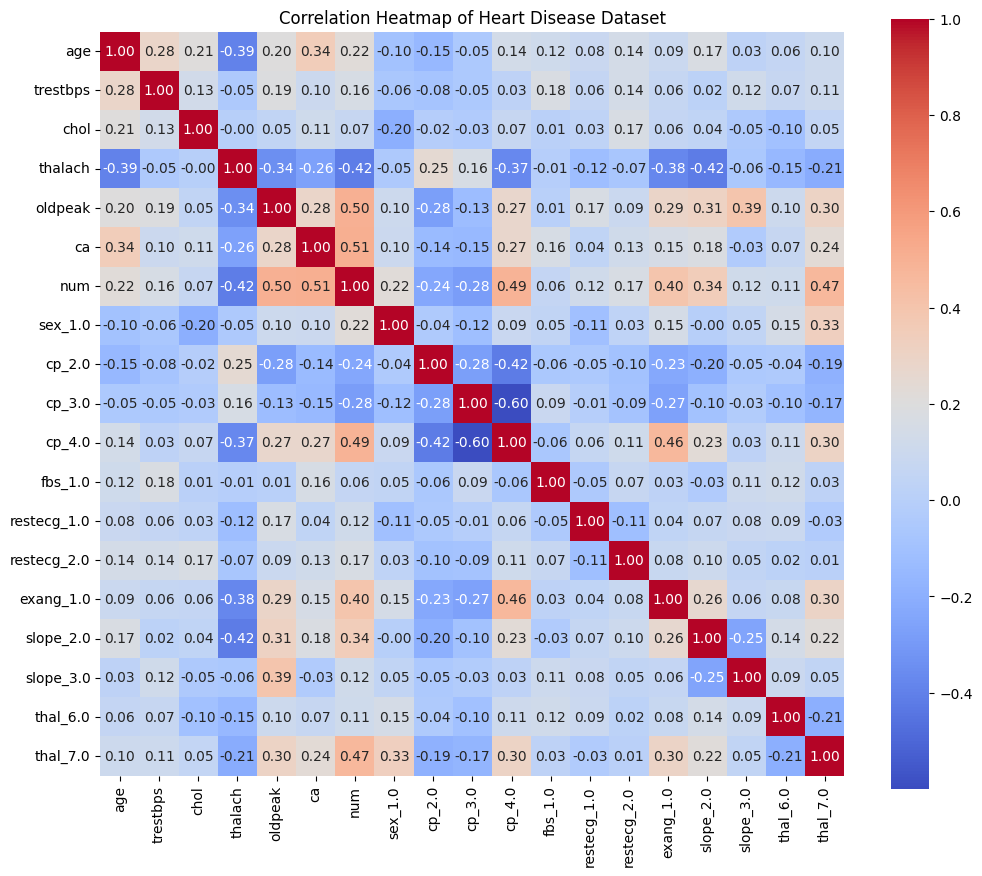

In [9]:
# correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_preprocessed.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()


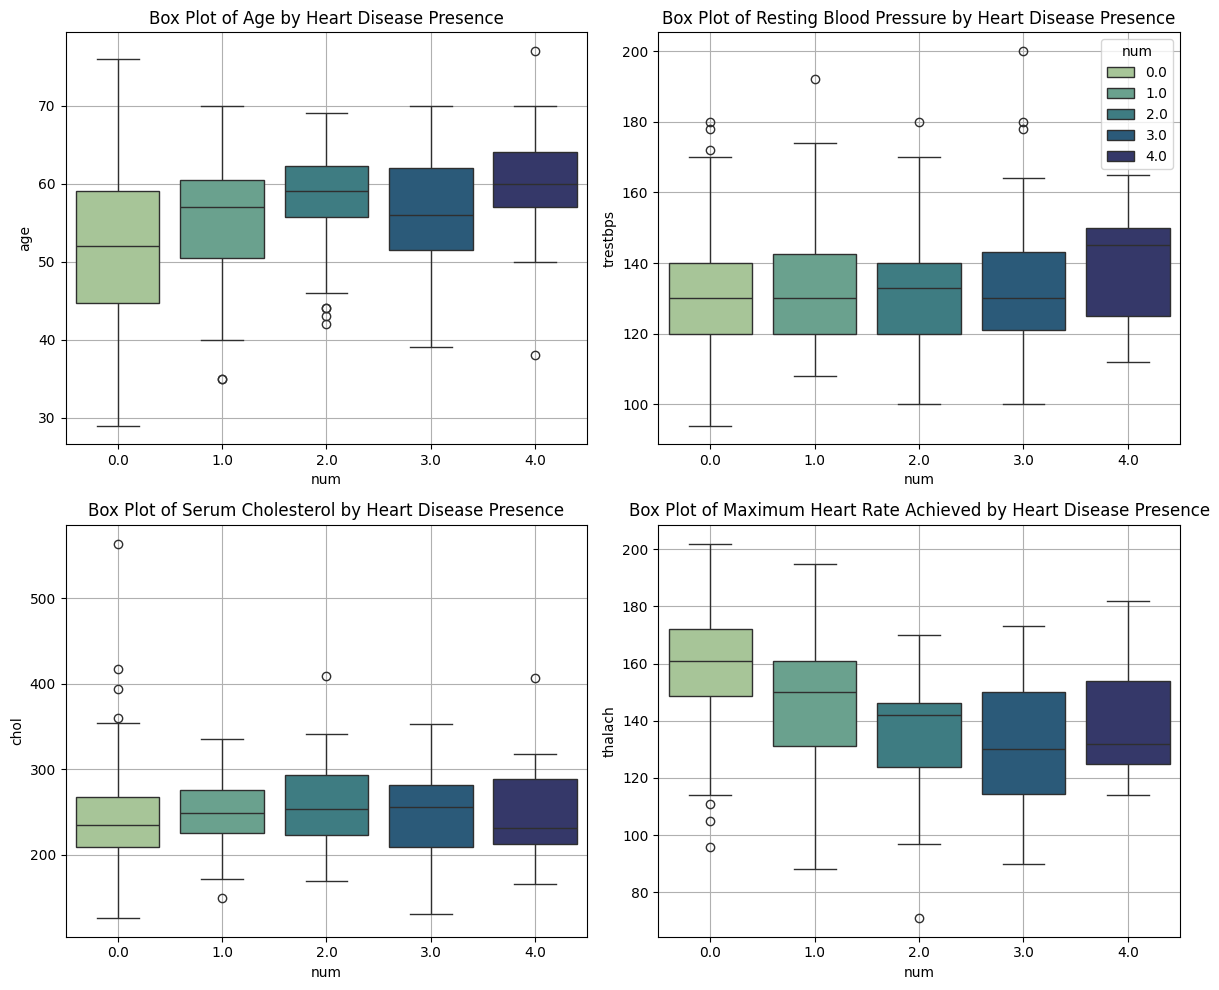

In [ ]:
#boxplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x='num', y='age', data=df, hue='num', palette='crest', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Box Plot of Age by Heart Disease Presence')
axs[0, 0].grid(True)


sns.boxplot(x='num', y='trestbps', data=df, hue='num', palette='crest', ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Resting Blood Pressure by Heart Disease Presence')
axs[0, 1].grid(True)

sns.boxplot(x='num', y='chol', data=df, hue='num', palette='crest', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Box Plot of Serum Cholesterol by Heart Disease Presence')
axs[1, 0].grid(True)

sns.boxplot(x='num', y='thalach', data=df, hue='num', palette='crest', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Box Plot of Maximum Heart Rate Achieved by Heart Disease Presence')
axs[1, 1].grid(True)


plt.tight_layout()
plt.show()